<a href="https://colab.research.google.com/github/Supaporn-Bututham/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

## Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

## Explore Data

In [3]:
X.shape

(500, 2)

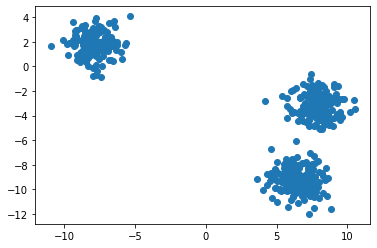

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

## Clustering

### Import

In [5]:
from sklearn.cluster import KMeans

### Define

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

### Fit-Predict

In [7]:
y_clust = kmeans.fit_predict(X)

In [8]:
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

### Plot

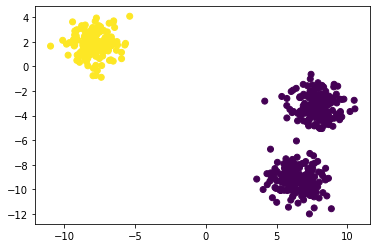

In [9]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

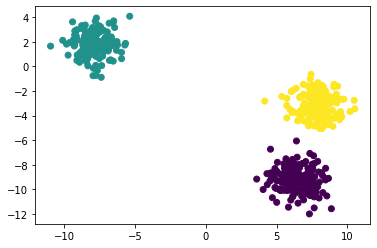

In [10]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

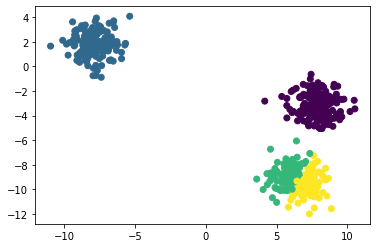

In [11]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

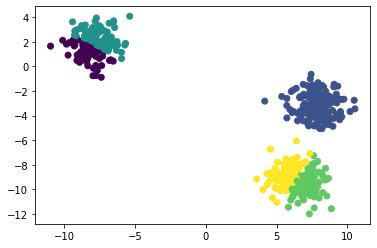

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

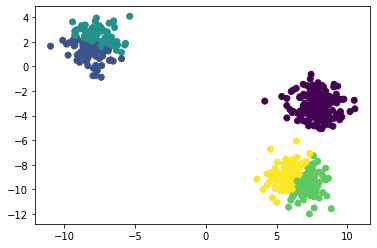

In [12]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

# Example Application (Color Quantization)

In [19]:
import cv2
import os

In [23]:
img = cv2.imread('/content/babytenlee.jpg') 

In [24]:
img.shape

(960, 640, 3)

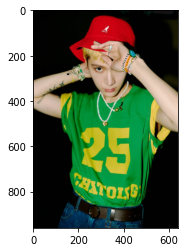

In [25]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [26]:
import numpy as np

In [27]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(112083, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [28]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [29]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(614400, 3)

In [31]:
final_color = myquantize.fit_predict(img_row)

### ใช้ centroid เป็นตัวแทนของสี

In [32]:
centroid = myquantize.cluster_centers_

In [33]:
centroid

array([[  1.54127912,   1.91457727,   1.10901617],
       [206.82741989, 180.59147356, 159.56106553],
       [  4.23664046, 137.69876451,  44.57746162],
       [ 99.77820583, 163.4553293 ,  48.46083287],
       [119.33377193,   8.12149123,   7.43070175],
       [214.02253202, 194.20515459,  67.15515201],
       [  6.10189648,  49.80532272,  76.17937971],
       [  4.82689364, 105.78513257,  16.87637009],
       [159.99901328, 128.41077799,  84.93631879],
       [228.2560238 , 203.75490196, 186.29065457],
       [ 92.34998274,  79.60098976,  45.77316147],
       [  2.80662123, 152.31108634,  68.38944375],
       [ 22.86634726,  25.70100314,  10.01187803],
       [185.3134484 , 160.39013089, 127.95335727],
       [191.20208821, 184.06138614,  32.52669667],
       [195.30840887,   3.23589122,  16.29387192]])

แทนสีคืนลงไป

In [36]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


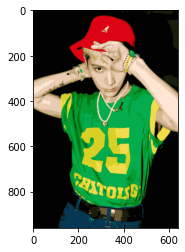

In [37]:
plt.imshow(new_img/225)

In [38]:
plt.imsave('img.jpg',new_img/255)

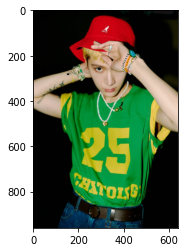

In [39]:
plt.imshow(RGB_img)

### Hierachical Clustering
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

### Clustering Evaluation
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation